# Charleston airport wind data

Your assignment is to visualize and analyze wind data collected at the Charleston airport (CHS) in 2024.

Data is available here:
https://mesonet.agron.iastate.edu/request/download.phtml?network=SC_ASOS

<img src="./figures/sea-breeze-blows-from-sea-to-land-during-the-day-vector.jpg" width = 800>


## Use the data to make the following plots and answer the following questions:

1. **Were the winds stronger in April or October?** The 'sknt' column provides the vector speed in knots **use this one**
    - Make histograms of the wind speeds in each month.
    - Bootstrap resample the data within each month. Use the `.sample()` to resample the data many times (at least 10,000) with `replace=True`. In doing so, you should create resampled data sets that are the length of the initial data set, calculate the mean and compile the bootstrap resampled means.


2. **Were the winds blowing in different directions in April and October?** The 'drct' column provides the vector azimuth
    - Make rose diagrams of the wind directions in each month.
    - Bootstrap resample the azimuths. Use the `.sample()` to resample the data many times (at least 10,000) with `replace=True`. In doing so, you should create resampled data sets that are the length of the initial data set, calculate the mean and compile the bootstrap resampled means. Remember that calculating a vector mean is different than calculating an arithmetic mean and you should use the approach we took in class to calculate the mean directions for your bootstrap resampled data sets. 
    
3. **Do comparisons wind directions for early morning hours (4 to 8 am; hour 4 to 8) and evening hours (6 - 10 pm; hour 18 to 22) in the summer (months = June, July, and August).**

First, let's set up the modules needed to answer these questions

In [1]:
### Import more libraries as needed
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Part 0: Data import and cleaning **[6 points]**

We need to import the data first.

<font color=goldenrod>**_Code for you to write_**</font> **[1 point]**
- Import file `CHS_winddata_2024Jan-Dec.csv`

In [2]:
#import the data
wind_data= pd.read_csv('data/CHS_winddata_2024Jan-Dec.csv')

<font color=goldenrod>**_Code for you to write_**</font> **[1 point]**
- Rename column `valid` to `date_time`

In [3]:
print(f'Curent column names: \n{wind_data.columns}')
wind_data.rename({'valid':'date_time'})
print(f'New column names: \n{wind_data.columns}')
wind_data.describe()


Curent column names: 
Index(['station', 'valid', 'drct', 'sknt', 'sped', 'gust', 'gust_mph'], dtype='object')
New column names: 
Index(['station', 'valid', 'drct', 'sknt', 'sped', 'gust', 'gust_mph'], dtype='object')


,drct,sknt,sped,gust,gust_mph
count,9498.000000,9709.000000,9709.000000,1265.000000,1265.000000
mean,154.474626,6.871562,7.902297,21.797628,25.067273
std,113.777282,4.226767,4.860782,5.340776,6.141892
min,0.000000,0.000000,0.000000,14.000000,16.100000
25%,40.000000,4.000000,4.600000,18.000000,20.700000
50%,170.000000,7.000000,8.050000,21.000000,24.150000
75%,240.000000,9.000000,10.350000,24.000000,27.600000
max,360.000000,39.000000,44.850000,51.000000,58.650000


Notice that columns `'gust'` and `'gust_mph'` are all `NaN`s. We don't need these.

We will drop unncessary columns, `'gust'`, and `'gust_mph'`

<font color=goldenrod>**_Code for you to write_**</font> **[1 point]**
- Drop columns `gust` and `gust_mph`

In [4]:
wind_data = wind_data.drop(['gust','gust_mph'],axis=1)
wind_data.head(5)

,station,valid,drct,sknt,sped
0,CHS,2024-01-01 00:56,240.0,6.0,6.90
1,CHS,2024-01-01 01:56,230.0,5.0,5.75
2,CHS,2024-01-01 02:56,230.0,5.0,5.75
3,CHS,2024-01-01 03:56,230.0,4.0,4.60
4,CHS,2024-01-01 04:56,240.0,5.0,5.75


There are also some columns that occasionally have `NaN` values in other rows. These will skew our statistics, so we should remove these too.

<font color=goldenrod>**_Code for you to write_**</font> **[1 point]**
- Use `.dropna` to remove remaining `NaN` values

In [5]:
#Remove `NaN` values
print(f'starting with {len(wind_data)} rows')
wind_data = wind_data.dropna()
print(f'finishing with {len(wind_data)} rows')

starting with 9711 rows
finishing with 9498 rows


There's also an issue that if wind speed `sknt`=0, the direction `drct` will also be 0. This will also skew our statistics. Let's remove all rows where `sknt` = 0, or else keep where `sknt` > 0.

<font color=goldenrod>**_Code for you to write_**</font> **[1 point]**
- Remove rows where `sknt` is 0

In [6]:
wind_data = wind_data[wind_data['sknt']>0]

You should now have **8447** rows in wind_data. 

In [7]:
len(wind_data)

8447

### Reading in prepared data

In case you didn't get the correct number of lines, we're going to now use a pre-cleaned dataset so that you can do the rest of the notebook.

**From now on, only use `wind_data_clean`**

In [8]:
#Remove the other dataframe to prevent confusion
del wind_data

#import the data
wind_data_clean = pd.read_csv('./data/CHS_winddata_2024Jan-Dec_Clean.csv')
wind_data_clean.head()
len (wind_data_clean)

8447

We're going to split the dates into separate columns to help us later.

Ignore any warnings.

In [9]:
import datetime

wind_data_clean['year'] = pd.to_datetime(wind_data_clean['date_time']).dt.year
wind_data_clean['month'] = pd.to_datetime(wind_data_clean['date_time']).dt.month
wind_data_clean['day'] = pd.to_datetime(wind_data_clean['date_time']).dt.day
wind_data_clean['hour'] = pd.to_datetime(wind_data_clean['date_time']).dt.hour
wind_data_clean['minute'] = pd.to_datetime(wind_data_clean['date_time']).dt.minute

wind_data_clean.head()

/tmp/ipykernel_561177/3301551775.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  wind_data_clean['year'] = pd.to_datetime(wind_data_clean['date_time']).dt.year
/tmp/ipykernel_561177/3301551775.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  wind_data_clean['month'] = pd.to_datetime(wind_data_clean['date_time']).dt.month
/tmp/ipykernel_561177/3301551775.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  wind_data_clean['day'] = pd.to_datetime(wind_data_clean['date_time']).dt.day
/tmp/ipykernel_561177/3301551775.py:6: UserWarning: Could not infer format, so each elem

,station,date_time,drct,sknt,sped,year,month,day,hour,minute
0,CHS,1/1/24 0:56,240,6,6.90,2024,1,1,0,56
1,CHS,1/1/24 1:56,230,5,5.75,2024,1,1,1,56
2,CHS,1/1/24 2:56,230,5,5.75,2024,1,1,2,56
3,CHS,1/1/24 3:56,230,4,4.60,2024,1,1,3,56
4,CHS,1/1/24 4:56,240,5,5.75,2024,1,1,4,56


We are going to use the same function from class.

In [10]:
def get_arrow_lengths(azimuth):
    azimuth_radians = np.radians(azimuth)
    x_length = np.sin(azimuth_radians)
    y_length = np.cos(azimuth_radians)
    return x_length,y_length

Create columns of `x_length` and `y_length` by converting the wind direction in series `drct` using our `get_arrow_lengths` function.

<font color=goldenrod>**_Code for you to write_**</font> **[1 point]**

In [11]:
wind_data_clean['x_length'], wind_data_clean['y_length'] = get_arrow_lengths(wind_data_clean['drct'])
wind_data_clean.head()

,station,date_time,drct,sknt,sped,year,month,day,hour,minute,x_length,y_length
0,CHS,1/1/24 0:56,240,6,6.90,2024,1,1,0,56,-0.866025,-0.500000
1,CHS,1/1/24 1:56,230,5,5.75,2024,1,1,1,56,-0.766044,-0.642788
2,CHS,1/1/24 2:56,230,5,5.75,2024,1,1,2,56,-0.766044,-0.642788
3,CHS,1/1/24 3:56,230,4,4.60,2024,1,1,3,56,-0.766044,-0.642788
4,CHS,1/1/24 4:56,240,5,5.75,2024,1,1,4,56,-0.866025,-0.500000


### Question 1 [6 points]

Stronger wind speed in October or April? **[1 point for written answer]**

To answer the question: **[5 points for code]**
1. Create new dataframes from `wind_data_clean` for the months of April and October. Notice that there is a `month` data series in `wind_data_clean`. April will be 1 and October will be 7.
2. Plot a **single histogram** that shows the wind speed from series `sknt` for October and April. Remember to add axis labels, a title, and a legend.
3. Bootstrap the values of `sknt` April and October with 10000 samples each and calculate the means Add the means two new variables called `apr_mean_wind_speed` and `oct_mean_wind_speed`
4. Calculate the means of `apr_mean_wind_speed` and `oct_mean_wind_speed`, these should be 8.8 and 6.8 respectively.
5. Plot up the bootstrapped variables. Add vertical lines showing 95% confidence intervals around bootstrapped means. Add axis labels, a title, and a legend.

In [12]:
#1. Create new dataframes from `wind_data_clean` for the months of February and August. Notice that there is a `month` data series in `wind`.
#April will be 4 and October will be 10.
apr_wind_data = wind_data_clean[wind_data_clean['month']==4]
oct_wind_data = wind_data_clean[wind_data_clean['month']==10]

In [13]:
#oct_wind_data.describe()

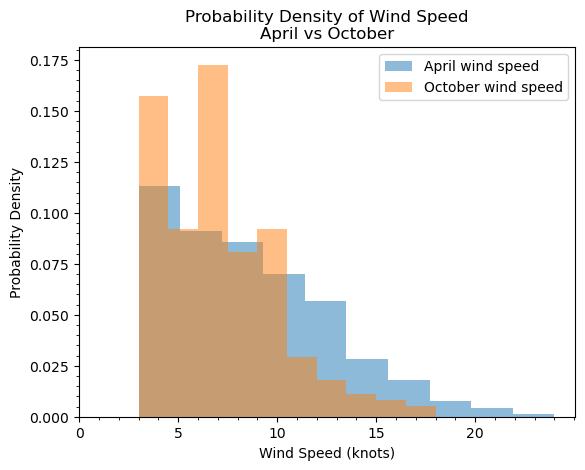

In [14]:
#2. Plot a single histogram that shows the wind speed from series `sknt` for October and April.
#Remember to add axis labels, a title, and a legend.
plt.hist(apr_wind_data['sknt'], label='April wind speed', alpha=0.5, density=True)
plt.hist(oct_wind_data['sknt'], label='October wind speed', alpha=0.5, density=True)
plt.title(f'Probability Density of Wind Speed\nApril vs October')
plt.xlabel('Wind Speed (knots)')
plt.xticks(np.arange(0,25, 5))
plt.minorticks_on()
plt.ylabel('Probability Density')
plt.legend()
plt.show()

In [15]:
#3. Bootstrap the values of `sknt` for October and January with 10000 samples each and calculate the means. Add the means two new
#variables called `apr_mean_wind_speed` and `October_mean_wind_speed`
apr_mean_wind_speed = []
oct_mean_wind_speed = []

for i in range(10000):
    apr_mean_wind_speed.append(apr_wind_data.sample(n=len(apr_wind_data), replace=True)['sknt'].mean())
for i in range(10000):
    oct_mean_wind_speed.append(oct_wind_data.sample(n=len(oct_wind_data), replace=True)['sknt'].mean())



In [16]:
#4. Calculate the means of `apr_mean_wind_speed` and `October_mean_wind_speed`, these should be 8.8 and 6.8 respectively.
mean_apr_spd = sum(apr_mean_wind_speed)/len(apr_mean_wind_speed)
mean_oct_spd = sum(oct_mean_wind_speed)/len(oct_mean_wind_speed)
print(f'mean April = {mean_apr_spd:.1f}\nmean October = {mean_oct_spd:.1f}')

mean April = 8.8
mean October = 6.8


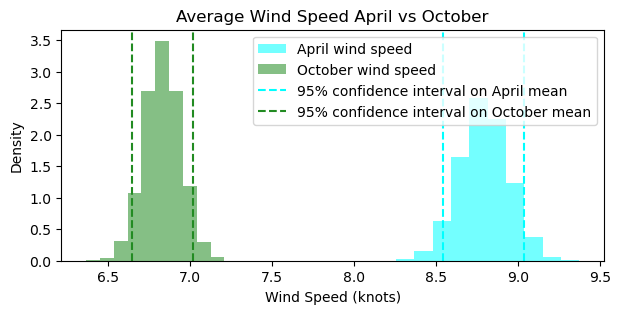

In [17]:
#5. Plot histogram of the bootstrapped variables
# Add vertical lines showing 95% confidence intervals around bootstrapped means.
# Add axis labels, a title, and a legend.
plt.figure(figsize=(7,3))
plt.hist(apr_mean_wind_speed, label='April wind speed', alpha=0.55, density=True, color='cyan')
plt.hist(oct_mean_wind_speed, label='October wind speed', alpha=0.55, density=True, color='forestgreen')

# add confidence intervals
plt.axvline(x=np.percentile(apr_mean_wind_speed,5),linestyle='--',color='cyan',label='95% confidence interval on April mean')
plt.axvline(x=np.percentile(apr_mean_wind_speed,95),linestyle='--',color='cyan')

plt.axvline(x=np.percentile(oct_mean_wind_speed,5),linestyle='--',color='forestgreen',label='95% confidence interval on October mean')
plt.axvline(x=np.percentile(oct_mean_wind_speed,95),linestyle='--',color='forestgreen')

plt.title('Average Wind Speed April vs October')
plt.xlabel('Wind Speed (knots)')
plt.ylabel('Density')
plt.legend()
plt.show()


You should get something like the figure below

<img src="./figures/CHS_WindSpeed_Bootstrap.png" width = 600>

<font color=red>**Question:**</font> Is the wind stronger in April or October? Comment on the 95% confidence intervals and whether we can be certain if any similar or difference is statistically significant or not.  **[1 points]**

**Write your answer and explain why in the box below.**

From bootstrapping the wind data provided, we can say under the 95% confidence interval that the mean wind speed in April is higher than the mean wind speed in October. 

### Question 2 [6 points]

Were the winds blowing in different directions in April and October? **[1 point for written answer]**

To answer the question: **[5 points for code]**
1. Define the `make_rose_diagram` function (already done for you)
2. Define the `mean_angular_direction` (already done for you)
3. Plot rose diagrams of each of the April and October data `drct`
4. (we did this in class) Bootstrap the values of `x_length` and `y_length` for October and April with 10000 samples each and calculate the mean angular direction. Add the means to new variables called `apr_mean_wind_dir` and `October_mean_wind_dir` 
5. Calculate the means of `apr_mean_wind_dir` and `October_mean_wind_dir`, these should be 186.3 and 284.8 respectively.
6. Plot up the bootstrapped variables (already done for you)

In [18]:
# 1. Define the `make_rose_diagram` function (already done for you)
def make_rose_diagram(azimuths,color='black',bin_width=10,title='',mean_direction=None):
    binarray = np.arange(0,360+bin_width,bin_width) # make an array to use for bins in plt.hist
    azimuth_counts, azimuth_bins, patches = plt.hist(azimuths,bins=binarray) # get back the counts
    plt.clf()
    bins = binarray[0:-1] # delete the last bin
    thetas = np.radians(bins) # convert the binarray to radians.  
    widths = np.radians(np.ones(len(thetas))*bin_width) # make the widths array

    fig = plt.subplot(111, polar=True) # Specify polar axes
    fig.set_theta_direction(-1) # Reverse direction of degrees (CW)
    fig.set_theta_zero_location("N") # Specify 0-degrees as North
    plt.bar(thetas, azimuth_counts, width=widths, bottom=0, color=color)
    if mean_direction != None:
        plt.bar(np.radians(mean_direction), np.max(azimuth_counts), width=0.01,bottom=0, color='black')
    plt.title(title)
    plt.show()

In [19]:
def mean_angular_direction(x_total,y_total):
    if (x_total >= 0) & (y_total > 0):
        angle = np.rad2deg(np.arctan(x_total/y_total))
    elif (x_total > 0) & (y_total < 0):
        angle = 180+np.rad2deg(np.arctan(x_total/y_total))
    elif (x_total < 0) & (y_total < 0):
        angle = 180+np.rad2deg(np.arctan(x_total/y_total))
    elif (x_total < 0) & (y_total > 0):
        angle = 360+np.rad2deg(np.arctan(x_total/y_total))
    return(angle)

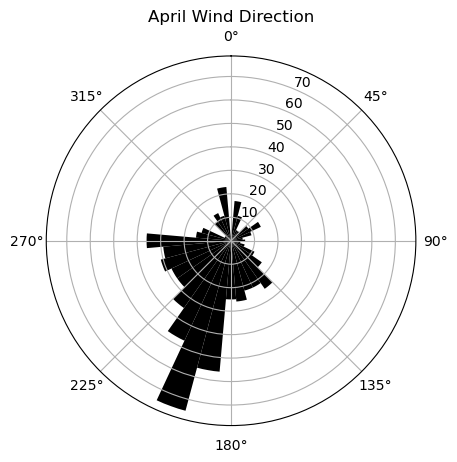

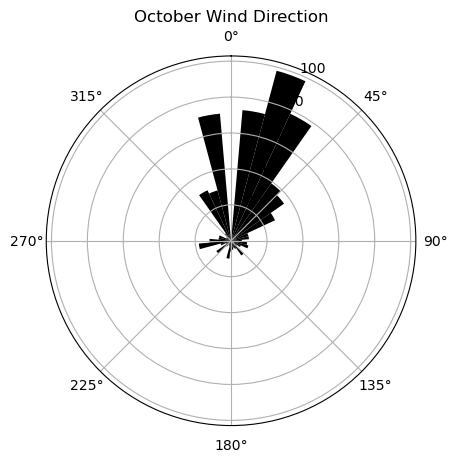

In [20]:
# 3. Plot rose diagrams of each of the April and October data `drct`
make_rose_diagram(azimuths=apr_wind_data['drct'], title='April Wind Direction')
make_rose_diagram(azimuths=oct_wind_data['drct'], title='October Wind Direction')

In [21]:
#4. Bootstrap the values of `drct` for October and January with 10000 samples each and calculate the means. Add the means two new
#variables called `apr_mean_wind_dir` and `October_mean_wind_dir`
apr_mean_wind_dir = []
oct_mean_wind_dir = []

for i in range(10000):
    apr_sample = apr_wind_data.sample(n=len(apr_wind_data), replace=True)
    x_total_apr = np.sum(apr_sample['x_length'])
    y_total_apr = np.sum(apr_sample['y_length'])
    apr_mean_wind_dir.append(mean_angular_direction(x_total_apr, y_total_apr))
for i in range(10000):
    oct_sample = oct_wind_data.sample(n=len(oct_wind_data), replace=True)
    x_total_oct = np.sum(oct_sample['x_length'])
    y_total_oct = np.sum(oct_sample['y_length'])
    oct_mean_wind_dir.append(mean_angular_direction(x_total_oct, y_total_oct))

In [22]:
#5. Calculate the means of `apr_mean_wind_dir` and `October_mean_wind_dir`, these should be 210.5 and 18.0 respectively.
mean_apr_wind_dir = sum(apr_mean_wind_dir)/len(apr_mean_wind_dir)
mean_oct_wind_dir = sum(oct_mean_wind_dir)/len(oct_mean_wind_dir)
print(f'mean April = {mean_apr_wind_dir:.1f}\nmean October = {mean_oct_wind_dir:.1f}')

mean April = 210.6
mean October = 18.0


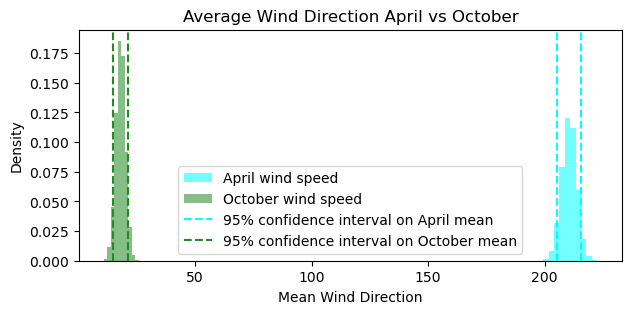

In [23]:
#6. Plot histogram of the bootstrapped variables
# Add vertical lines showing 95% confidence intervals around bootstrapped means.
# Add axis labels, a title, and a legend.
plt.figure(figsize=(7,3))
plt.hist(apr_mean_wind_dir, label='April wind speed', alpha=0.55, density=True, color='cyan')
plt.hist(oct_mean_wind_dir, label='October wind speed', alpha=0.55, density=True, color='forestgreen')

# add confidence intervals
plt.axvline(x=np.percentile(apr_mean_wind_dir,5),linestyle='--',color='cyan',label='95% confidence interval on April mean')
plt.axvline(x=np.percentile(apr_mean_wind_dir,95),linestyle='--',color='cyan')

plt.axvline(x=np.percentile(oct_mean_wind_dir,5),linestyle='--',color='forestgreen',label='95% confidence interval on October mean')
plt.axvline(x=np.percentile(oct_mean_wind_dir,95),linestyle='--',color='forestgreen')

plt.title('Average Wind Direction April vs October')
plt.xlabel('Mean Wind Direction')
plt.ylabel('Density')
plt.legend()
plt.show()


You should get something like the figure below

<img src="./figures/CHS_WindDir_Bootstrap.png" width = 600>

<font color=red>**Question:**</font> Are the wind directions different between April and October? Comment on the 95% confidence intervals and whether we can be certain if any similar or difference is statistically significant or not. **[1 points]**

**Write your answer and explain why in the box below.**

From bootstrapping the prvided wind data. We can say that the average wind direction is different between april and october. The 95% confidense intervals show that we can be confident in the conclusion and that it is statistically significant. 

### Question 3 [6 points]

Are the wind directions different between the early morning hours (4 to 8 am; hour 4 to 8) and late afternoon hours (6 to 10 pm; hour 18 to 22) in the summer (months = June, July, August months 6 to 8)? **[1 point for written answer]**

To answer the question: **[5 points for code]**
1. make two new variables of `summer_am_wind` and `summer_pm_wind`. These will both have months between 6 and 8 (inclusive) and `summer_am_wind` will have hours between 4 and 8 (inclusive) while `summer_pm_wind` will have hours between 18 and 22 (inclusive)
2. Plot rose diagrams of `summer_am_wind` and `summer_pm_wind` using the series `drct`
3. Bootstrap the values of `drct` for `summer_am_wind` and `summer_pm_wind` with 10000 samples each and calculate the means. Add the means two new variables called `am_mean_wind_dir` and `pm_mean_wind_dir`
4. Calculate the means of `am_mean_wind_dir` and `pm_mean_wind_dir`, these should be 6.1 and 7.4 respectively.
5. Plot histogram of the bootstrapped variables. Add vertical lines showing 95% confidence intervals around bootstrapped means. Add axis labels, a title, and a legend.

In [24]:
# 1. make two new variables of `summer_am_wind` and `summer_pm_wind`. These will both have months between 7 and 9 (inclusive)
# and `summer_am_wind` will have hours between 4 and 8 (inclusive) while `summer_pm_wind` will have hours between 18 and 22 (inclusive)
summer_wind = wind_data_clean[(wind_data_clean['month']>=6) & (wind_data_clean['month']<=8)]
summer_am_wind = summer_wind[(summer_wind['hour']>=4) & (summer_wind['hour']<=8)]
summer_pm_wind = summer_wind[(summer_wind['hour']>=18) & (summer_wind['hour']<=22)]


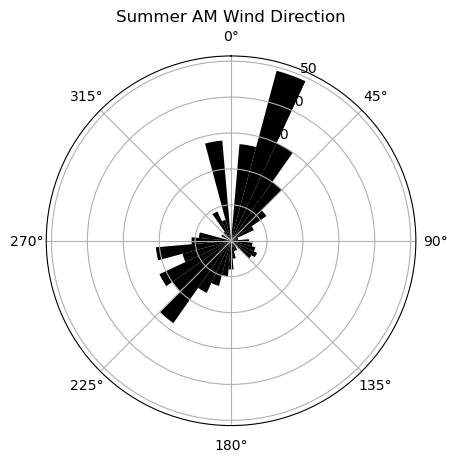

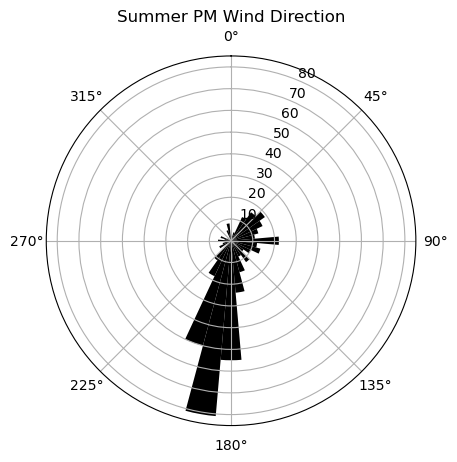

In [25]:
# 2. Plot rose diagrams of `summer_am_wind` and `summer_pm_wind` direction
make_rose_diagram(azimuths=summer_am_wind['drct'], title='Summer AM Wind Direction')
make_rose_diagram(azimuths=summer_pm_wind['drct'], title='Summer PM Wind Direction')


In [26]:
# 3. Bootstrap the values of `drct` for `summer_am_wind` and `summer_pm_wind` with 10000 samples each and calculate the means. 
# Add the means two new variables called `am_mean_wind_dir` and `pm_mean_wind_dir`

am_mean_wind_dir = []
pm_mean_wind_dir = []

for i in range(10000):
    am_sample = summer_am_wind.sample(n=len(summer_am_wind), replace=True)
    x_total_am = np.sum(am_sample['x_length'])
    y_total_am = np.sum(am_sample['y_length'])
    am_mean_wind_dir.append(mean_angular_direction(x_total_am, y_total_am))
for i in range(10000):
    pm_sample = summer_pm_wind.sample(n=len(summer_pm_wind), replace=True)
    x_total_pm = np.sum(pm_sample['x_length'])
    y_total_pm = np.sum(pm_sample['y_length'])
    pm_mean_wind_dir.append(mean_angular_direction(x_total_pm, y_total_pm))

In [27]:
# 4. Calculate the means of `am_mean_wind_dir` and `pm_mean_wind_dir`, these should be 324.5 and 160.8 respectively.
mean_am_wind_dir = sum(am_mean_wind_dir)/len(am_mean_wind_dir)
mean_pm_wind_dir = sum(pm_mean_wind_dir)/len(pm_mean_wind_dir)
print(f'mean April = {mean_am_wind_dir:.1f}\nmean October = {mean_pm_wind_dir:.1f}')

mean April = 324.6
mean October = 160.9


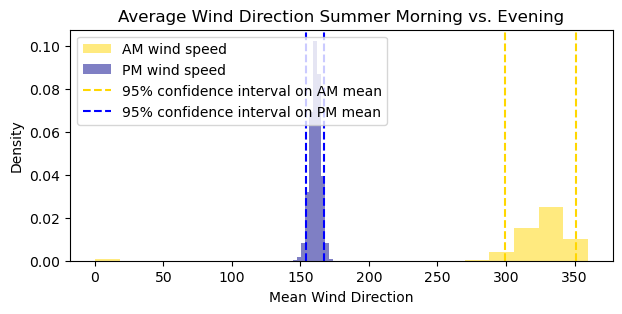

In [38]:
#5. Plot histogram of the bootstrapped variables
# Add vertical lines showing 95% confidence intervals around bootstrapped means.
# Add axis labels, a title, and a legend.plt.figure(figsize=(10,4))
plt.figure(figsize=(7,3))
plt.hist(am_mean_wind_dir, label='AM wind speed', alpha=.5, density=True, color='gold', bins=20)
plt.hist(pm_mean_wind_dir, label='PM wind speed', alpha=.5, density=True, color='darkblue')

# add confidence intervals
plt.axvline(x=np.percentile(am_mean_wind_dir,5),linestyle='--',color='gold',label='95% confidence interval on AM mean')
plt.axvline(x=np.percentile(am_mean_wind_dir,95),linestyle='--',color='gold')

plt.axvline(x=np.percentile(pm_mean_wind_dir,5),linestyle='--',color='blue',label='95% confidence interval on PM mean')
plt.axvline(x=np.percentile(pm_mean_wind_dir,95),linestyle='--',color='blue')

plt.title('Average Wind Direction Summer Morning vs. Evening')
plt.xlabel('Mean Wind Direction')
plt.ylabel('Density')
plt.legend()
plt.show()

You should get something like the figure below

<img src="./figures/CHS_WindDir_AMPM_Bootstrap.png" width = 600>

<font color=red>**Question:**</font> Are the wind directions in summer different between morning and afternoon? Comment on the 95% confidence intervals and whether we can be certain if any similar or difference is statistically significant or not. **[1 point]**

**Write your answer and explain why in the box below.**

Using bootstrapping on the provided wind data. Because the 95% confidence intervals do not overlap, we can be highly certain that the summer wind direction is differnt in the moring hours than it is in the evening hours. 

### Turn in this notebook

Save your completed notebook as a PDF and upload to Blackboard.